In [2]:
# library("knitr")
# library("BiocStyle")
# library("ggplot2")
# library("gridExtra")
library("phyloseq")
# library("DECIPHER")
# library("phangorn")
# library("grid")
# library("lattice")
library("qiime2R")
# library("writexl")
# library("vegan")
# library("dplyr")
# library("nlme")
# library("reshape2")
# library('microbiome')
# library('knitr')
# library('xtable')
# library('kableExtra')

In [3]:
setwd('/Users/alchemist/Aakash/BonnGut/Microbiome_pipeline')
workdir = getwd()

In [4]:
#
pseq<-qza_to_phyloseq(
    features=paste(workdir,"/feature_table/table.qza",sep=""),
    tree=paste(workdir,"/phylo_tree/rooted_tree.qza",sep=""),
         paste(workdir,"/taxonomy/tax_ezbiocloud.qza",sep=""),
    paste(workdir,"/metadata/metadata.tsv",sep="")
    )

# Calculate Alpha Diversity

In [6]:
ps_alpha_div <- estimate_richness(pseq, split = TRUE)
head(ps_alpha_div)

Warning message in estimate_richness(pseq, split = TRUE):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L1S105,63,63,0,63,3.454925,2.682108,0.8707597,7.737527,9.370957
L1S140,65,65,0,65,3.022989,2.660947,0.8518507,6.749945,9.864796
L1S208,85,85,0,85,3.766727,3.121034,0.8999369,9.993691,13.229121
L1S257,81,81,0,81,3.813556,3.262504,0.9261295,13.537212,13.078800
L1S281,72,72,0,72,3.162278,3.189387,0.9082814,10.902920,11.295130
L1S57,70,70,0,70,3.044902,2.905920,0.8661380,7.470381,10.400133


Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


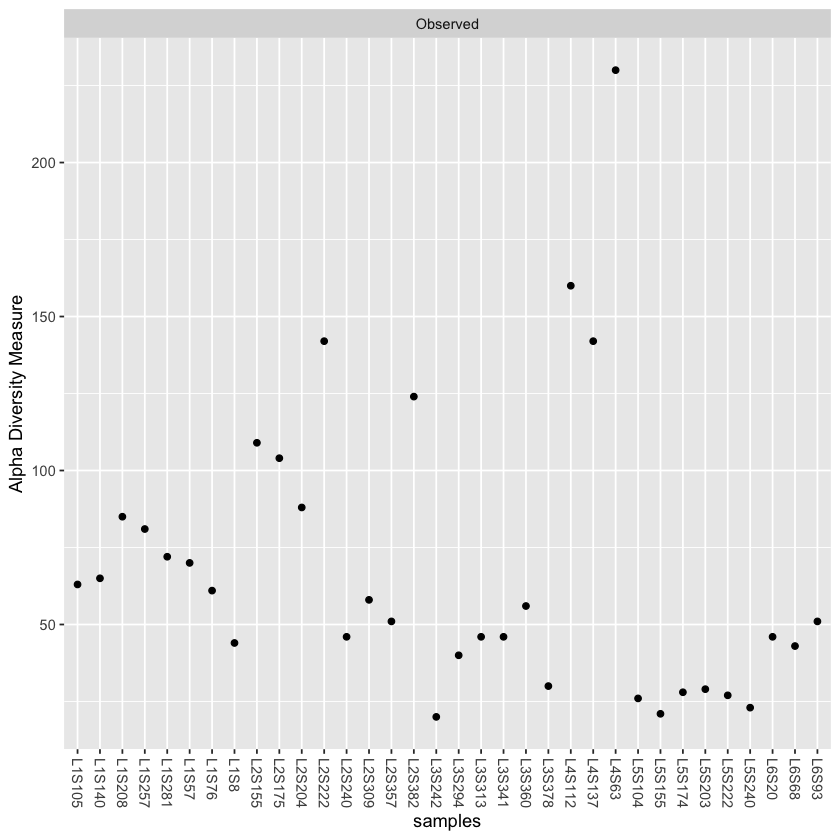

In [9]:
plot_richness(pseq,measures='Observed')

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


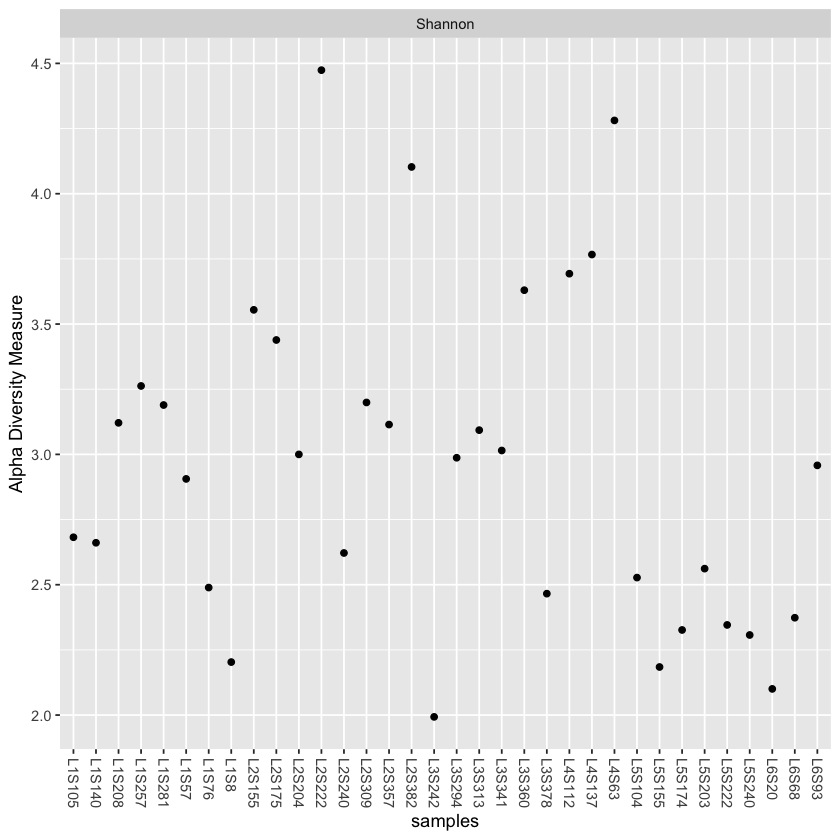

In [10]:
plot_richness(pseq,measures='Shannon')

In [ ]:
plot_richness(pseq,measures='Faith')

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
"The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry."


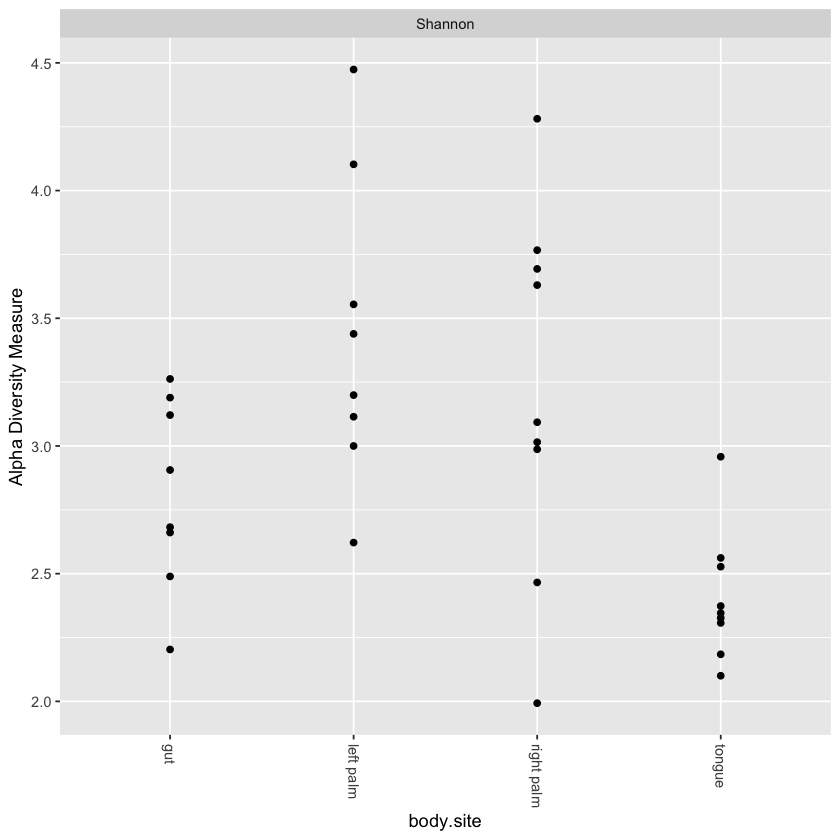

In [13]:
plot_richness(pseq,x='body.site',measures='Shannon')

In [7]:
help(plot_richness)

plot_richness {phyloseq},R Documentation
physeq,"(Required). phyloseq-class, or alternatively, an otu_table-class. The data about which you want to estimate."
x,"(Optional). A variable to map to the horizontal axis. The vertical axis will be mapped to the alpha diversity index/estimate and have units of total taxa, and/or index value (dimensionless). This parameter (x) can be either a character string indicating a variable in sample_data (among the set returned by sample_variables(physeq) ); or a custom supplied vector with length equal to the number of samples in the dataset (nsamples(physeq)). The default value is ""samples"", which will map each sample's name to a separate horizontal position in the plot."
color,"(Optional). Default NULL. The sample variable to map to different colors. Like x, this can be a single character string of the variable name in sample_data (among the set returned by sample_variables(physeq) ); or a custom supplied vector with length equal to the number of samples in the dataset (nsamples(physeq)). The color scheme is chosen automatically by link{ggplot}, but it can be modified afterward with an additional layer using scale_color_manual."
shape,"(Optional). Default NULL. The sample variable to map to different shapes. Like x and color, this can be a single character string of the variable name in sample_data (among the set returned by sample_variables(physeq) ); or a custom supplied vector with length equal to the number of samples in the dataset (nsamples(physeq)). The shape scale is chosen automatically by link{ggplot}, but it can be modified afterward with an additional layer using scale_shape_manual."
title,(Optional). Default NULL. Character string. The main title for the graphic.
scales,"(Optional). Default ""free_y"". Whether to let vertical axis have free scale that adjusts to the data in each panel. This argument is passed to facet_wrap. If set to ""fixed"", a single vertical scale will be used in all panels. This can obscure values if the measures argument includes both richness estimates and diversity indices, for example."
nrow,"(Optional). Default is 1, meaning that all plot panels will be placed in a single row, side-by-side. This argument is passed to facet_wrap. If NULL, the number of rows and columns will be chosen automatically (wrapped) based on the number of panels and the size of the graphics device."
shsi,(Deprecated). No longer supported. Instead see 'measures' below.
measures,"(Optional). Default is NULL, meaning that all available alpha-diversity measures will be included in plot panels. Alternatively, you can specify one or more measures as a character vector of measure names. Values must be among those supported: c(""Observed"", ""Chao1"", ""ACE"", ""Shannon"", ""Simpson"", ""InvSimpson"", ""Fisher"")."
sortby,"(Optional). A character string subset of measures argument. Sort x-indices by the mean of one or more measures, if x-axis is mapped to a discrete variable. Default is NULL, implying that a discrete-value horizontal axis will use default sorting, usually alphabetic."
